<a href="https://colab.research.google.com/github/ralbu85/STML/blob/main/Ch3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# House price of the boston area
# medv: target variable (median price of specific region of boston)
df = pd.read_csv('Boston.csv', index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


## Linear Regression using statsmodel

In [ ]:
# importing the module
import statsmodels.api as sm

In [ ]:
# Step 1: Defining X(predictor), y(target variable)
# We have to choose the column from the dataframe
y = df['medv']
X = df['lstat']

In [ ]:
# Step 2: Add constant variable to existing X
# statsmodel to include the intercept, we have to add constant columns to the existing dataset
X_with_intercept = sm.add_constant(X)

In [ ]:
# Step 3: we learn the linear regression model
model = sm.OLS(y, X_with_intercept) # create of the linear regression model object
result =  model.fit() # fit the model with training data
result.summary() # print out the model fitting result


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.08e-88
Time:                        10:19:38   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction

In [ ]:
# predict the target value of the first data point of traing dataset
X_with_intercept.iloc[0] # first datapoint of our training data
result.get_prediction(X_with_intercept.iloc[0]).predicted_mean # predicted value from the ML model

array([29.8225951])

In [ ]:
# get the prediction of multiple input data points

X_with_intercept.iloc[:10] # first ten data points of training dataset
result.get_prediction(X_with_intercept.iloc[:10]).predicted_mean

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693])

## Get the confidence interval of our prediction

In [ ]:
result.get_prediction(X_with_intercept.iloc[:10]).conf_int(obs=True, alpha=0.025)

array([[15.81907329, 43.82611691],
       [11.87947207, 39.8613075 ],
       [16.71742948, 44.73285449],
       [17.74757494, 45.77381662],
       [15.48797707, 43.49217858],
       [15.60150323, 43.60666426],
       [ 8.75714091, 36.73231391],
       [ 2.36138665, 30.35940486],
       [-7.94938094, 20.18710838],
       [ 4.31506501, 32.30092885]])

## Visualization of the result

In [ ]:
import matplotlib.pyplot as plt

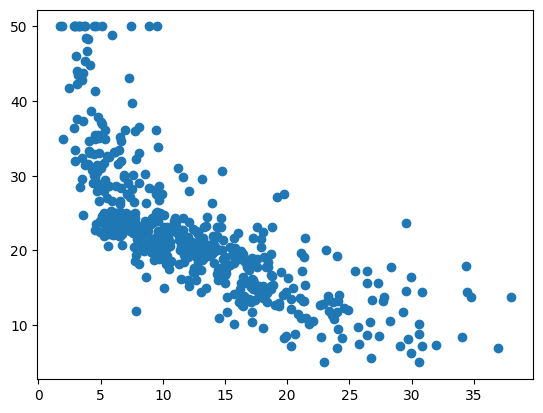

In [ ]:
plt.scatter(df['lstat'], df['medv'])

In [ ]:
# Get the parameter(learned) from the model
const = result.params['const']
lstat = result.params['lstat']
const, lstat

(34.55384087938308, -0.9500493537579922)

In [ ]:
# To draw the linear regression line over the scatter plot,
# We first need to get the range of the X variable
df['lstat'].min(), df['lstat'].max()

(1.73, 37.97)

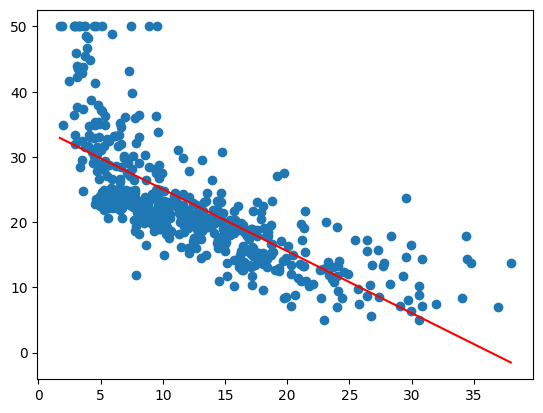

In [ ]:
x = np.linspace(df['lstat'].min(), df['lstat'].max(), 50)
y = const + lstat*x # collectively predict the value
plt.scatter(df['lstat'], df['medv'])
plt.plot(x,y, c='r')

## Interaction

In [ ]:
# X, y prepeartion
X = df[['lstat','age']]
y = df['medv']

In [ ]:
# put the interaction lstat x age
X['lstat_age'] = X['lstat'] * X['age']
X

<ipython-input-38-90cb9dee2639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lstat_age'] = X['lstat'] * X['age']


,lstat,age,lstat_age
1,4.98,65.2,324.696
2,9.14,78.9,721.146
3,4.03,61.1,246.233
4,2.94,45.8,134.652
5,5.33,54.2,288.886
...,...,...,...
502,9.67,69.1,668.197
503,9.08,76.7,696.436
504,5.64,91.0,513.240
505,6.48,89.3,578.664


In [ ]:
# Put constant
X = sm.add_constant(X)
X

,const,lstat,age,lstat_age
1,1.0,4.98,65.2,324.696
2,1.0,9.14,78.9,721.146
3,1.0,4.03,61.1,246.233
4,1.0,2.94,45.8,134.652
5,1.0,5.33,54.2,288.886
...,...,...,...,...
502,1.0,9.67,69.1,668.197
503,1.0,9.08,76.7,696.436
504,1.0,5.64,91.0,513.240
505,1.0,6.48,89.3,578.664


In [ ]:
# learning the model
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.86e-88
Time:                        10:39:46   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat_age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Include Nonlinear Tranformation

In [ ]:
X = df[['lstat','age']]
y = df['medv']

In [ ]:
X['lstat^2'] = X['lstat'] * X['lstat']
X

<ipython-input-43-df7be8787141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lstat^2'] = X['lstat'] * X['lstat']


,lstat,age,lstat^2
1,4.98,65.2,24.8004
2,9.14,78.9,83.5396
3,4.03,61.1,16.2409
4,2.94,45.8,8.6436
5,5.33,54.2,28.4089
...,...,...,...
502,9.67,69.1,93.5089
503,9.08,76.7,82.4464
504,5.64,91.0,31.8096
505,6.48,89.3,41.9904


In [ ]:
X = sm.add_constant(X)
X

,const,lstat,age,lstat^2
1,1.0,4.98,65.2,24.8004
2,1.0,9.14,78.9,83.5396
3,1.0,4.03,61.1,16.2409
4,1.0,2.94,45.8,8.6436
5,1.0,5.33,54.2,28.4089
...,...,...,...,...
502,1.0,9.67,69.1,93.5089
503,1.0,9.08,76.7,82.4464
504,1.0,5.64,91.0,31.8096
505,1.0,6.48,89.3,41.9904


In [ ]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     337.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          7.03e-120
Time:                        10:43:20   Log-Likelihood:                -1561.0
No. Observations:                 506   AIC:                             3130.
Df Residuals:                     502   BIC:                             3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2885      0.873     47.284      0.000      39.573      43.004
lstat         -2.6883      0.131    -20.502      0.000      -2.946      -2.431
age            0.0703      0.011      6.471      0.000       0.049       0.092
lstat^2        0.0495      0.004     13.315      0.000       0.042       0.057
==============================================================================
Omnibus:                       81.499   Durbin-Watson:                   1.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.528
Skew:                           0.918   Prob(JB):                     1.69e-34
Kurtosis:                       5.001   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regression

In [ ]:
y = df['medv']
X = df.drop(columns=['medv']) # we drop some columns by specifying the parameters

In [ ]:
X = sm.add_constant(X)
X

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
503,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
504,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
505,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [ ]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.23e-133
Time:                        10:47:15   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF (strong indicator for multicolinearlity)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [ ]:
X = df.drop(columns=['medv'])
y = df['medv']

In [ ]:
X = sm.add_constant(X)
X

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
1,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
2,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
3,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
4,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
503,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
504,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
505,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [ ]:
# list of columns
X.columns

Index(['const', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat'],
      dtype='object')

In [ ]:
X.columns[0]

'const'

In [ ]:
for i,j in enumerate(X.columns):
    print(j, VIF(X,i))

const 535.5266192987414
crim 1.7674859154310127
zn 2.2984589077358097
indus 3.9871806307570994
chas 1.071167773758404
nox 4.369092622844793
rm 1.9125324374368868
age 3.0882320397311966
dis 3.954036641628298
rad 7.445300760069838
tax 9.002157663471797
ptratio 1.7970595931297786
lstat 2.8707765008417514


## One-hot encoding

In [ ]:
df = pd.read_csv('Carseats.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
## pd.get_dummmies() -> function that support one-hot encoding

df2 = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'], drop_first=True)


In [ ]:
y = df2['Sales']
X = df2.drop(columns=['Sales'])

In [ ]:
X['Income_Advertising'] = X['Income'] * X['Advertising']
X['Price_Age'] = X['Price'] * X['Age']

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          6.14e-166
Time:                        11:02:03   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5756      1.009      6.519      0.000       4.592       8.559
CompPrice              0.0929      0.004     22.567      0.000       0.085       0.101
Income                 0.0109      0.003      4.183      0.000       0.006       0.016
Advertising            0.0702      0.023      3.107      0.002       0.026       0.115
Population             0.0002      0.000      0.433      0.665      -0.001       0.001
Price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
ShelveLoc_Good         4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc_Medium       1.9533      0.126     15.531      0.000       1.706       2.201
Urban_Yes              0.1402      0.112      1.247      0.213      -0.081       0.361
US_Yes                -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income_Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price_Age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""